In [19]:
#package/library imports
import numpy as np
import matplotlib.pyplot as plt
from sympy import fft
from scipy.linalg import toeplitz

In [20]:
# Python program to convert a list to string  
def listToString(k): 
    
    # initialize an empty string
    key = "" 
    
    # traverse in the string  
    for element in k: 
        key += element  
    
    # return string  
    return key 

In [21]:
#initializing raw_key list
raw_key = []

#fetching data from .txt file
my_file = open("Amp Squeezed.txt", "r") #Amp Squeezed.txt or VACUUM.txt
data = my_file.read()

# replacing end splitting the text when newline ('\n') is seen.
raw_key = data.split("\n")
my_file.close()

# cleaning empty char in raw_key
while('' in raw_key):
     raw_key.remove('')

#converting raw_key list to numpy array variable
raw_key = np.array(raw_key, dtype =int)

#printing len and elements of raw_key
print("length=",len(raw_key))
print("\nraw_key:",raw_key)

length= 9893

raw_key: [139 140 141 ... 141  94  93]


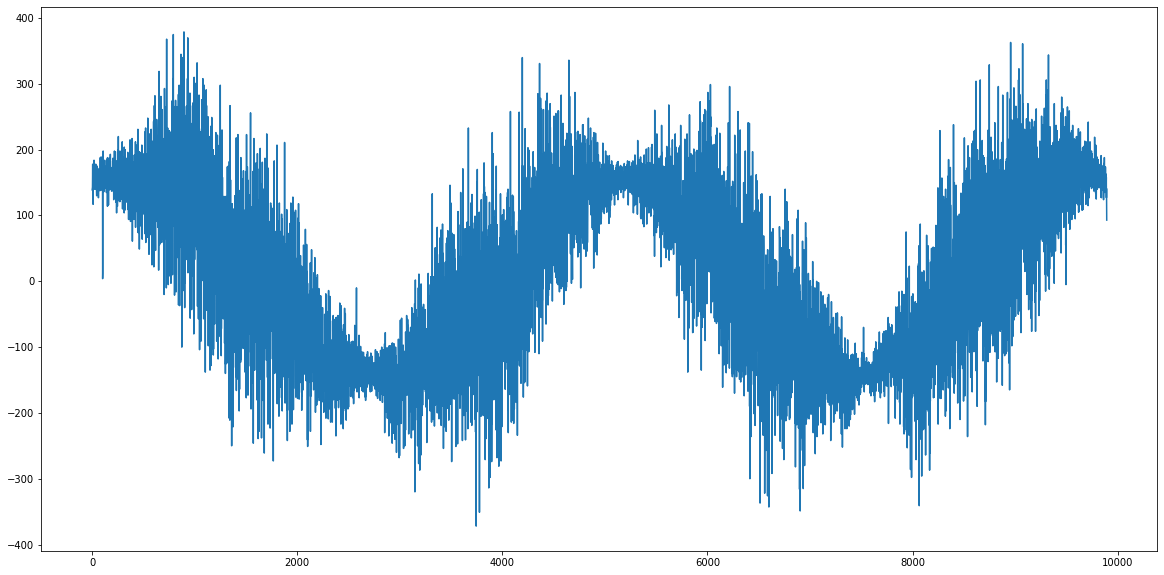

In [28]:
plt.figure(figsize=(20,10)) 
t = np.arange(1,len(raw_key)+1)
plt.plot(t,raw_key)
plt.show()

In [29]:
print(f"\n\t\t\t>>>Extracted Key<<<\n {raw_key[:]}")


			>>>Extracted Key<<<
 [139 140 141 ... 141  94  93]


In [30]:
mu = np.average(raw_key)
sigma = np.std(raw_key)
print("Mean of the raw_key is % s " % (mu)) 
print("Standard Deviation of the raw_key is % s "% (sigma))

Mean of the raw_key is 13.437379965632266 
Standard Deviation of the raw_key is 130.91636011008993 


In [31]:
# Toeplitz Matrix Generation

i = len(raw_key)
j = len(raw_key)//100
r = np.random.randint(2, size=(1, i))
c = np.random.randint(2, size=(1, j))
t_mat = toeplitz(c,r)
print("\nToeplitz Matrix Generation:\nRow: r =", r)
print("\n")
print("Column: c =", c)
print("\n")
print("Toeplitz Matrix =\n", t_mat)


Toeplitz Matrix Generation:
Row: r = [[1 1 0 ... 0 1 1]]


Column: c = [[0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1
  0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0
  0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0]]


Toeplitz Matrix =
 [[0 1 0 ... 0 1 1]
 [1 0 1 ... 0 0 1]
 [1 1 0 ... 1 0 0]
 ...
 [1 0 0 ... 1 1 1]
 [1 1 0 ... 1 1 1]
 [0 1 1 ... 1 1 1]]


In [32]:
# Toeplitz hashing

ex_key = np.zeros((j,1), dtype=int)
ex_key = np.matmul(t_mat, raw_key)
     
print("\nExtracted Key: % s "%(ex_key))
e = len(ex_key)
print("length=",e)


Extracted Key: [63314 68339 54158 56847 53930 60311 50988 59920 56484 54254 61767 57584
 56662 56045 58306 51874 56952 56946 59680 57283 53712 60227 56316 62662
 62363 60497 55382 60748 63202 62454 58541 61459 63215 58730 56315 56805
 59051 61580 55241 57372 51289 62004 49756 58317 61161 61765 58690 60451
 54108 60199 58096 53310 56782 58288 60659 61432 57866 62906 59690 59626
 56284 65077 58386 56787 59969 58785 56682 60928 57172 61879 59821 57116
 62651 55688 58812 61553 64746 60624 61991 62490 52405 64268 64664 59716
 57497 56571 56399 60704 60521 62813 64211 70217 64740 63331 56995 60673
 62770 61848] 
length= 98


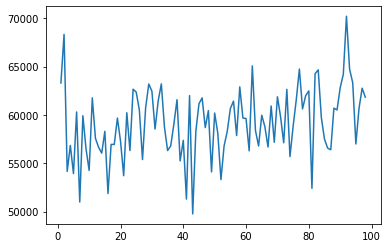

In [33]:
u = t[:j]
plt.plot(u,ex_key)
plt.show()

In [34]:
muu = np.average(ex_key)
sigmaa = np.std(ex_key)
print("\nStandard Deviation of the ex_key is % s "% (sigmaa))
print("Mean of the ex_key is %s " % (muu)) 


Standard Deviation of the ex_key is 3644.413318743965 
Mean of the ex_key is 59200.9693877551 


In [35]:
print(f"\nExtracted Key: {ex_key[:]}")


Extracted Key: [63314 68339 54158 56847 53930 60311 50988 59920 56484 54254 61767 57584
 56662 56045 58306 51874 56952 56946 59680 57283 53712 60227 56316 62662
 62363 60497 55382 60748 63202 62454 58541 61459 63215 58730 56315 56805
 59051 61580 55241 57372 51289 62004 49756 58317 61161 61765 58690 60451
 54108 60199 58096 53310 56782 58288 60659 61432 57866 62906 59690 59626
 56284 65077 58386 56787 59969 58785 56682 60928 57172 61879 59821 57116
 62651 55688 58812 61553 64746 60624 61991 62490 52405 64268 64664 59716
 57497 56571 56399 60704 60521 62813 64211 70217 64740 63331 56995 60673
 62770 61848]


In [36]:
k = []
for i in range(1, j):
    k.append(bin(int(ex_key[i]))[2:].zfill(8))
print(k)

['10000101011110011', '1101001110001110', '1101111000001111', '1101001010101010', '1110101110010111', '1100011100101100', '1110101000010000', '1101110010100100', '1101001111101110', '1111000101000111', '1110000011110000', '1101110101010110', '1101101011101101', '1110001111000010', '1100101010100010', '1101111001111000', '1101111001110010', '1110100100100000', '1101111111000011', '1101000111010000', '1110101101000011', '1101101111111100', '1111010011000110', '1111001110011011', '1110110001010001', '1101100001010110', '1110110101001100', '1111011011100010', '1111001111110110', '1110010010101101', '1111000000010011', '1111011011101111', '1110010101101010', '1101101111111011', '1101110111100101', '1110011010101011', '1111000010001100', '1101011111001001', '1110000000011100', '1100100001011001', '1111001000110100', '1100001001011100', '1110001111001101', '1110111011101001', '1111000101000101', '1110010101000010', '1110110000100011', '1101001101011100', '1110101100100111', '1110001011110000'

In [37]:
# Binary Key
key = listToString(k)
print("\nExtracted key=",key)


Extracted key= 100001010111100111101001110001110110111100000111111010010101010101110101110010111110001110010110011101010000100001101110010100100110100111110111011110001010001111110000011110000110111010101011011011010111011011110001111000010110010101010001011011110011110001101111001110010111010010010000011011111110000111101000111010000111010110100001111011011111111001111010011000110111100111001101111101100010100011101100001010110111011010100110011110110111000101111001111110110111001001010110111110000000100111111011011101111111001010110101011011011111110111101110111100101111001101010101111110000100011001101011111001001111000000001110011001000010110011111001000110100110000100101110011100011110011011110111011101001111100010100010111100101010000101110110000100011110100110101110011101011001001111110001011110000110100000011111011011101110011101110001110110000111011001111001111101111111110001110001000001010111101011011101011101001001010101110100011101010110110111101110011111110001101011110010

In [38]:
x = len(key)
print("length=",x)

length= 1554
